<a href="https://colab.research.google.com/github/LKSfiuza/MachineLearning-AI-UFV/blob/main/ELT574_118678_Atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando as bibliotecas para análise do problema e configurando o notebook

## OS para executar comandos de diretorio
import os

## Habilitar Google Drive no Colab
# from google.colab import drive
# drive.mount('/content/drive')

## NumPy para manipular matrizes e vetores
import numpy as np

## Pandas para manipular os dataframes
import pandas as pd

## Plotar figuras bonitas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

print('Setup completo!')

Setup completo!


## 1 . Ajuste um modelo de SVM de margens rígidas para classificar as amostras linearmente separáveis do problema, considerando as variáveis de entrada "petal length in cm" e "petal width in cm" do banco de dados.  Adicione o ponto [3, 1.5] do tipo Iris setosa e explique o que acontece com a margem rígida da SVM.

In [ ]:
from sklearn import datasets

# Separando as amostras linearmente separaveis

iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target

# Separando X e y em Setosa ou Versicolor

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [ ]:
from sklearn.svm import SVC

# CRIANDO SVM DE MARGEM RIGIDA

svm_clf = SVC(kernel='linear', C=1e10)
svm_clf.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

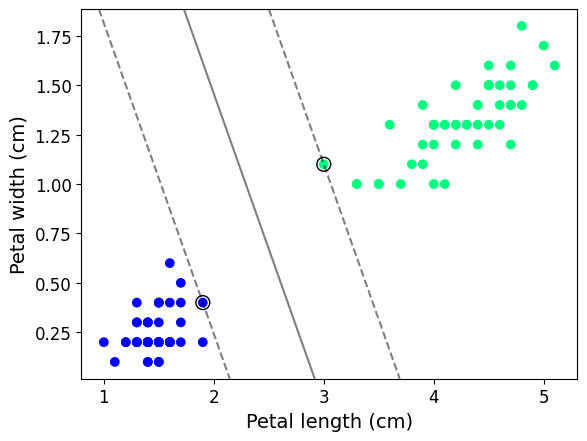

In [ ]:
# Criando função para plotar as fronteiras dee classificação

def plot_svm_decision_boundary(svm, X, y):
       plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
       ax = plt.gca()
       xlim = ax.get_xlim()
       ylim = ax.get_ylim()
       xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30))
       Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
       Z = Z.reshape(xx.shape)
       ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
       plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
       plt.xlabel('Petal length (cm)')
       plt.ylabel('Petal width (cm)')
       plt.show()

plot_svm_decision_boundary(svm_clf, X, y)

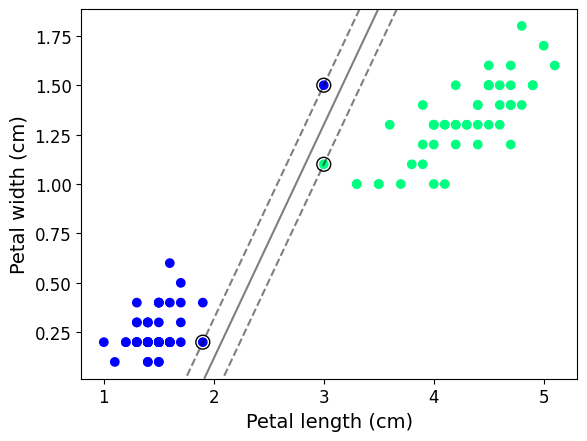

In [ ]:
# Adicionando o ponto [3,1.5]

X_novo= np.append(X, [[3, 1.5]], axis=0)
y_novo = np.append(y, [0])

# Treinar o SVM novamente com o novo ponto
svm_clf.fit(X_novo, y_novo)

plot_svm_decision_boundary(svm_clf, X_novo, y_novo)

## RESPOSTA : Pode-se notar que ao adicionar um outlier e treinar novamente o modelo ocorre uma enorme mudança na sua margem de decisão, ja que o novo ponto adicionado se torna um vetor de suporte.

## 2 - Para os dados utilizados no anterior, com a presença da nova amostra, ajuste um modelo de SVM de margens suaves, com os valores C = 1, 10, 100 e 1000. Comente o que acontece com as margens de cada um dos modelos. Qual se assemelha mais com o modelo de SVM de margens rígidas?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Criando um pipeline para o SVM

nsvm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

nsvm_clf.fit(X_novo, y_novo)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [ ]:
# Configurando diferentes SVMS de margens suaves, C = [1, 10, 100, 1000]

Cs = [1, 10, 100, 1000]
svms = [SVC(kernel='linear', C=C).fit(X_novo, y_novo) for C in Cs]


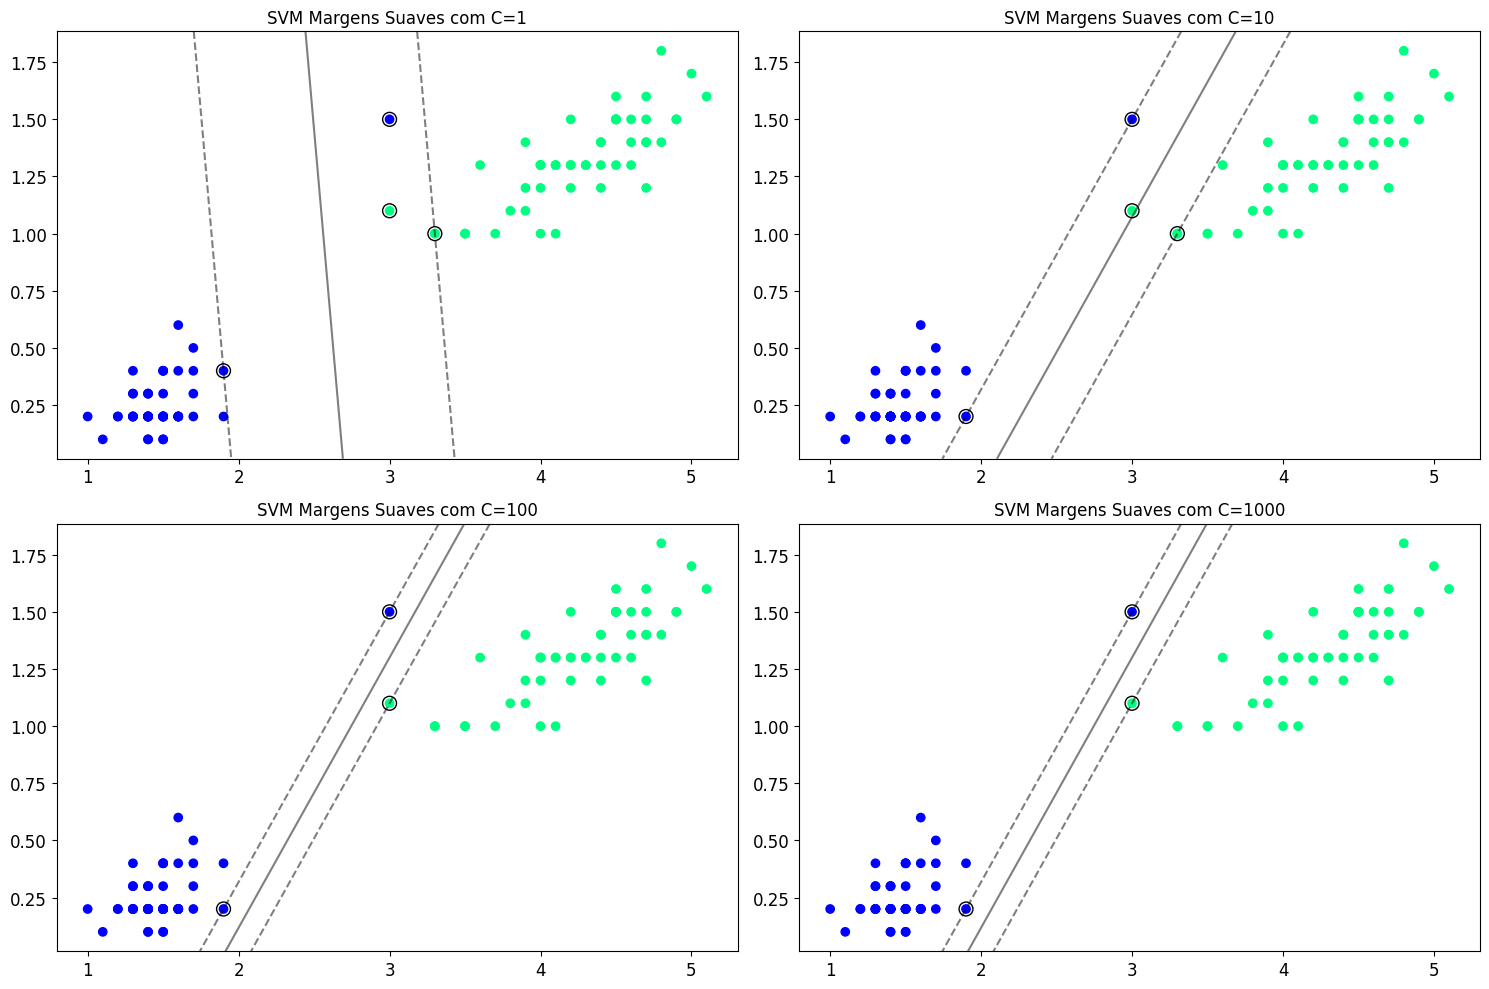

In [ ]:
# Criando uma função para plotar cada modelo com diferentes valores de C

def plot_svm_soft_margins(svms, X, y, Cs):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    for i, (svm, C) in enumerate(zip(svms, Cs)):
        ax = axes[i]
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30))
        Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
        ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
        ax.set_title(f'SVM Margens Suaves com C={C}')
    plt.tight_layout()
    plt.show()

plot_svm_soft_margins(svms, X_novo, y_novo, Cs)

## RESPOSTA
## C=1: As margens são mais largas, permitindo alguns erros de classificação, o que mostra uma regularização mais forte.
## C=10: As margens se estreitam, tornando o modelo mais rígido e menos permissivo a erros de classificação.
## C=100: As margens são ainda mais estreitas, mostrando um modelo muito rígido, praticamente sem erros de classificação nos dados de treinamento.
## C=1000: As margens são extremamente estreitas, mostrando um modelo altamente rígido e sem tolerância a erros de classificação, ajustando-se aos dados de treinamento.** Sendo esse o que mais se aproxima ao SVM de margem rígida.**

##3 - Ajuste modelos de SVMs não lineares com funções Kernel Polinomial e Gaussiana para os dados do Item 2 (com a presença da nova amostra). Explique o que acontece com o hiperplano de separação para cada uma das funções Kernel utilizadas.

In [ ]:
X = X_novo
y = y_novo

In [ ]:
# Importando as bibliotecas necessarias
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

svm_poly_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=1, loss="hinge", random_state=42))])

svm_poly_clf.fit(X, y)


svm_rbf_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=1, C=1))])

svm_rbf_clf.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(C=1, gamma=1))])

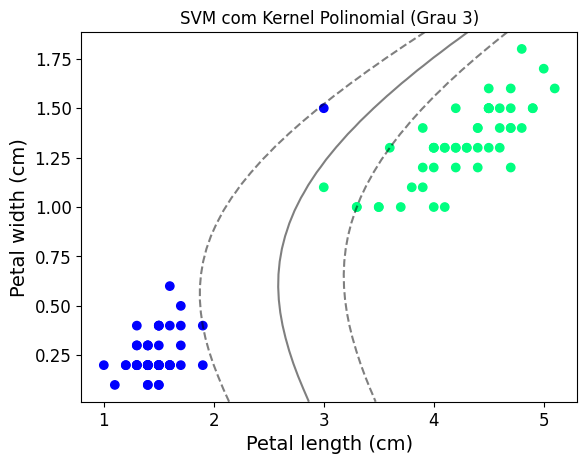

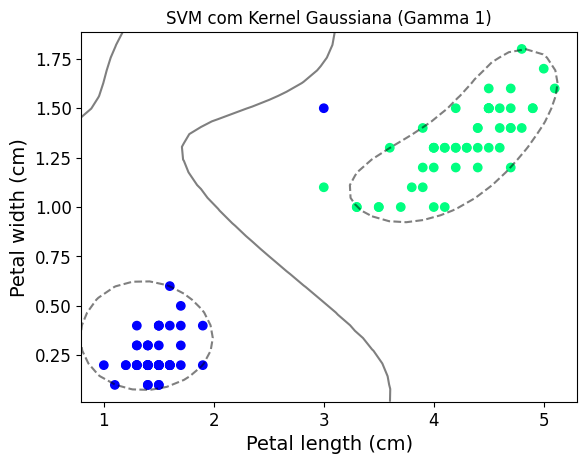

In [ ]:
def plot_svm_nonlinear(svm, X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30))
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.set_title(title)
    plt.xlabel('Petal length (cm)')
    plt.ylabel('Petal width (cm)')
    plt.show()

plot_svm_nonlinear(svm_poly_clf, X, y, 'SVM com Kernel Polinomial (Grau 3)')
plot_svm_nonlinear(svm_rbf_clf, X, y, 'SVM com Kernel Gaussiana (Gamma 1)')

## RESPOSTA: Diferente dos outros SVM esses se adaptam a o outilier separando-os de forma superior obtendo como na Gaussiana curvas de decisão robustas a ruidos e outliers, permitindo uma separação nao linear e satisfatória



## 4 - Ajuste um modelo de SVM não linear com função Kernel Gaussiana para os valores de gamma = 0.1, 1 e 10, e valores de C = 1, 10, 100 e 1000. O que acontece ao aumentar o valor de cada parâmetro da função gaussiana? Como estes aumentos afetam a classificação de amostras do problema?

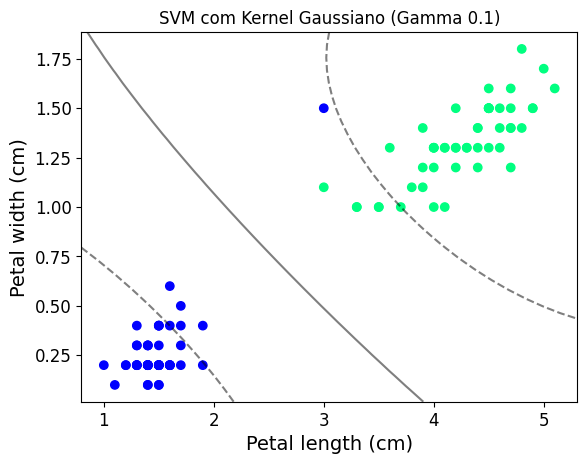

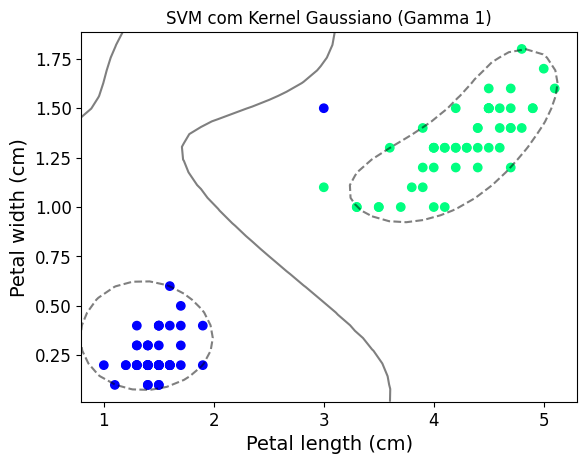

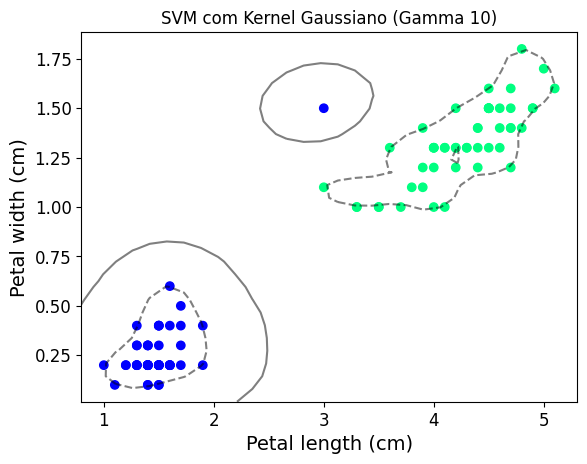

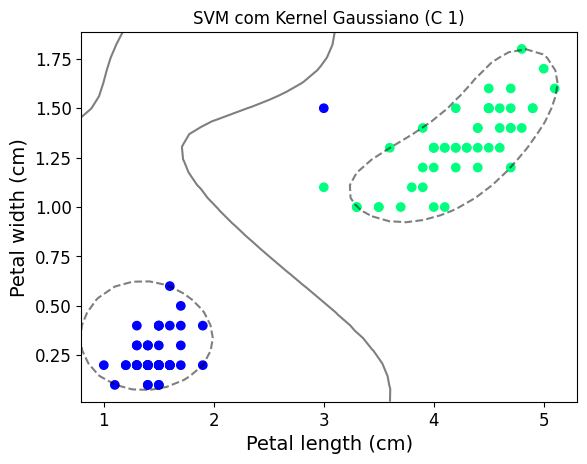

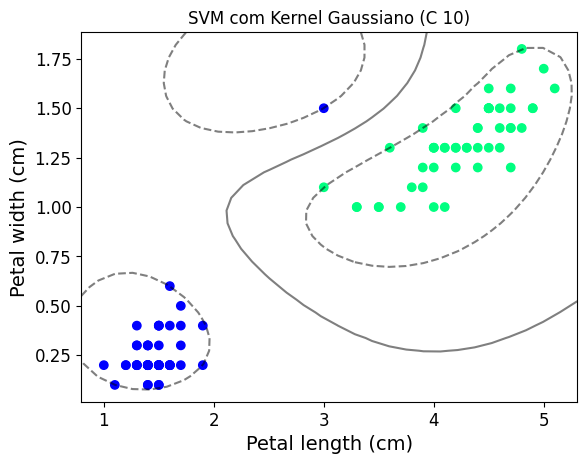

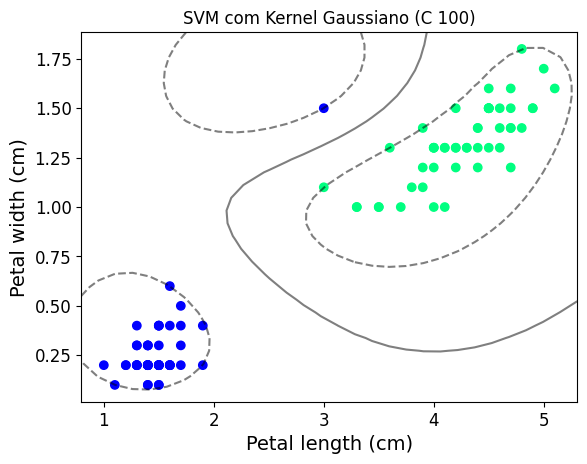

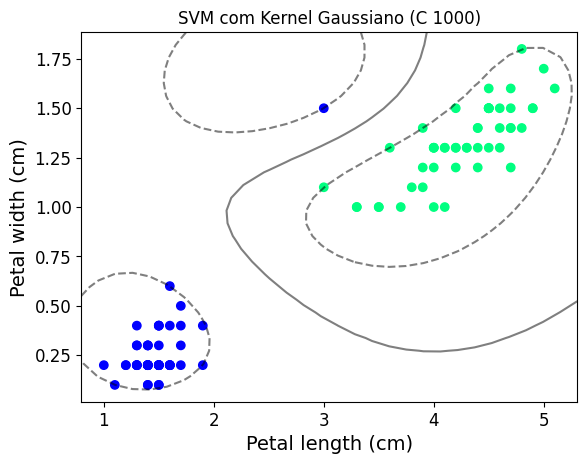

In [ ]:

# Criando uma função para plotar as fronteiras de classificação
def plot_svm_gaussian(svm, X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30))
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.set_title(title)
    plt.xlabel('Petal length (cm)')
    plt.ylabel('Petal width (cm)')
    plt.show()

# Modificando os valores de gamma
gamma_values = [0.1, 1, 10]
for gamma in gamma_values:
    svm_rbf_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=1))])
    svm_rbf_clf.fit(X, y)
    plot_svm_gaussian(svm_rbf_clf, X, y, f'SVM com Kernel Gaussiano (Gamma {gamma})')

# Modificando os valores de C
C_values = [1, 10, 100, 1000]
for C in C_values:
    svm_rbf_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=1, C=C))])
    svm_rbf_clf.fit(X, y)
    plot_svm_gaussian(svm_rbf_clf, X, y, f'SVM com Kernel Gaussiano (C {C})')



## Resposta:
## Com o aumento do valor de gamma, as curvas de decisão se tornam mais complexas e se adaptam melhor aos dados de treinamento. Porém corre o risco de overfitting, podendo nao generalizar ou predizer bem novos inputs de dados.
## Aumentando o valor de C, as margens de decisão sao diminuidos e o modelo se torna mais rígido. Isso pode levar a um modelo mais preciso, mas também pode levar a overfitting.
